# Supplementary results

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from plot_utils import load_results, get_dataframes, plot_results, plot_ctx_step

### ICL performance on all four curriculum conditions

In [2]:
path = '../../results/grid_iwl_icl_unrotated_blocked'
seeds = [i for i in range(1,11)]
fns = [f'{path}_seed{seed}' for seed in seeds]

results = load_results(seeds, fns, all_ctx_conds=True)

In [3]:
dfs = get_dataframes(results, n_groups=2, thresh=0.9, task='grid')

Removed seeds {1, 5, 7, 8, 10} due to threshold 0.9


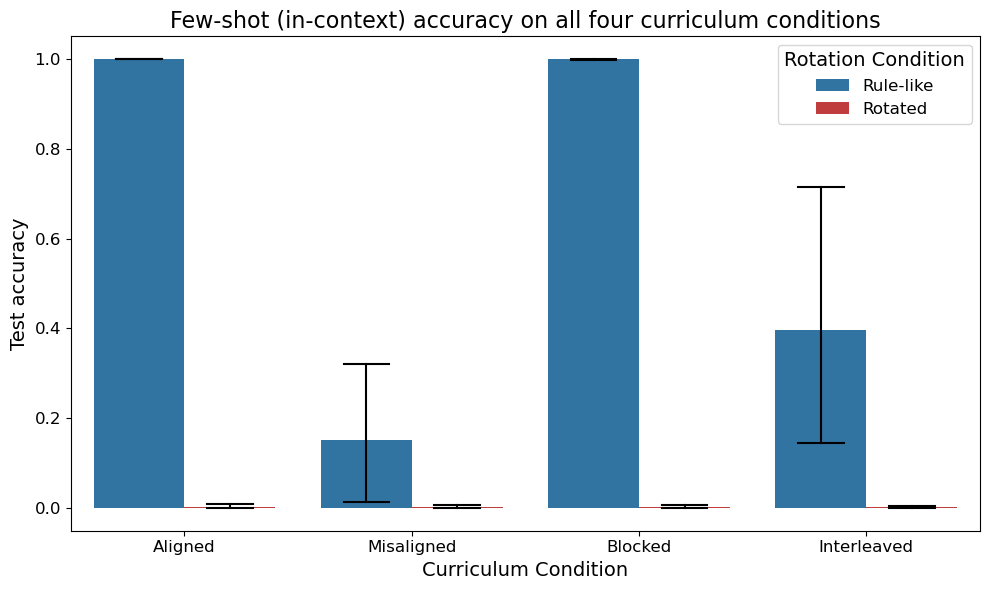

In [4]:
# Get dataframes
df, df_avg, df_melted, few_shot_df, finetune_df = dfs

# Plot parameters
pplot_palette = ['tab:blue', 'tab:red']
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with all four curriculum conditions and both rotation conditions
sns.barplot(data=few_shot_df, x='Curriculum', 
            y='Accuracy', hue='Rotation', 
            hue_order=['Rule-like', 'Rotated'],
            palette=pplot_palette, 
            capsize=0.2, errwidth=1.5, errcolor='black', 
            ax=ax)

# Set the plot title and labels
ax.set_title('Few-shot (in-context) accuracy on all four curriculum conditions', 
             fontsize=title_fontsize)
ax.set_ylabel('Test accuracy', fontsize=label_fontsize)
ax.set_xlabel('Curriculum Condition', fontsize=label_fontsize)
ax.set_ylim([-0.05, 1.05])

# Customize tick parameters
ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)

# Add legend
ax.legend(title='Rotation Condition', 
          title_fontsize=label_fontsize, fontsize=tick_fontsize, loc='best')

# Show the plot
plt.tight_layout()
plt.show()

### Metalearning on rotated tasks

In [5]:
path = '../../results/grid_iwl_icl_rotated_blocked'
seeds = [i for i in range(1,11)]
fns = [f'{path}_seed{seed}' for seed in seeds]

results = load_results(seeds, fns, all_ctx_conds=False)

In [6]:
dfs = get_dataframes(results, n_groups=2, thresh=0.9, task='grid', 
                     thresh_rotation='Rotated', thresh_curriculum='Blocked')

Removed seeds {2, 3, 4, 5, 6, 7, 8, 9, 10} due to threshold 0.9


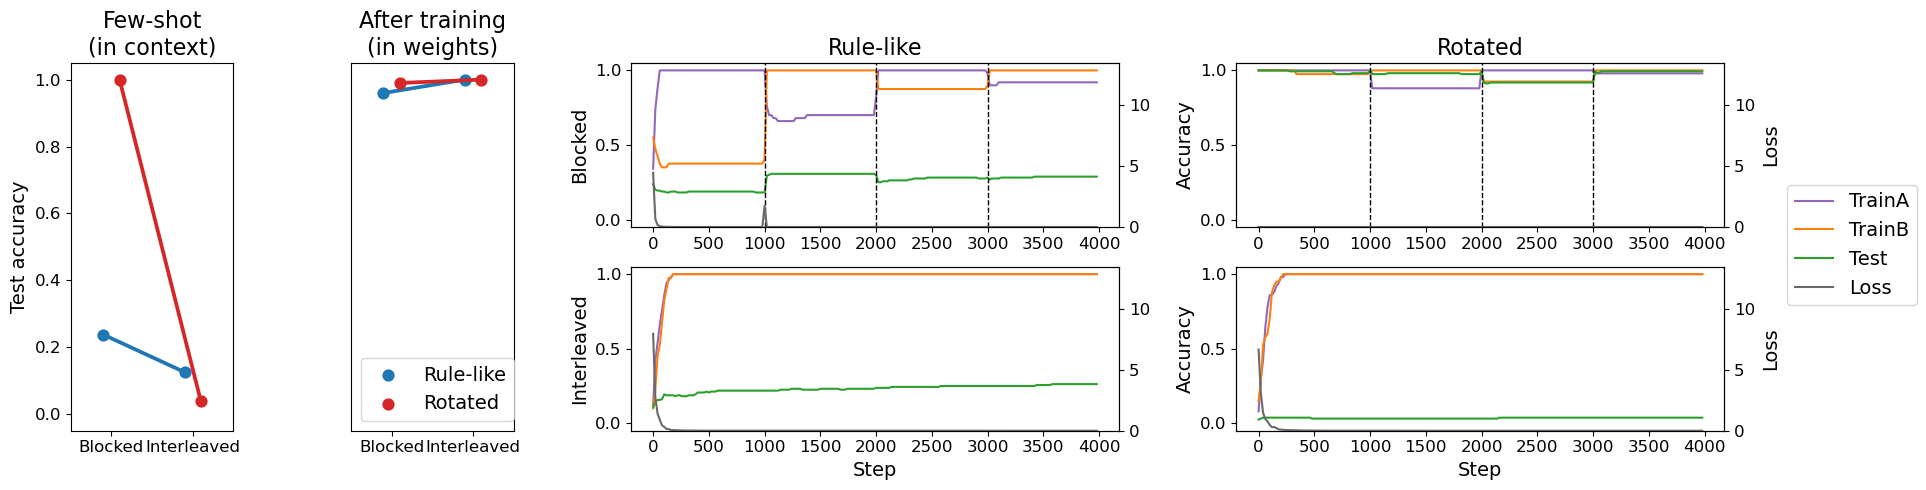

In [7]:
plot_results(dfs, task='grid', n_blocks=4, n_steps=1000, all_ctx_conds=False)

### Metalearning on interleaved curricula

In [8]:
path = '../../results/grid_iwl_icl_unrotated_interleaved'
seeds = [i for i in range(1,11)]
fns = [f'{path}_seed{seed}' for seed in seeds]

results = load_results(seeds, fns, all_ctx_conds=False)

In [9]:
dfs = get_dataframes(results, n_groups=2, thresh=0.9, task='grid')

Removed seeds {1, 2, 4, 5, 6, 7, 8, 9, 10} due to threshold 0.9


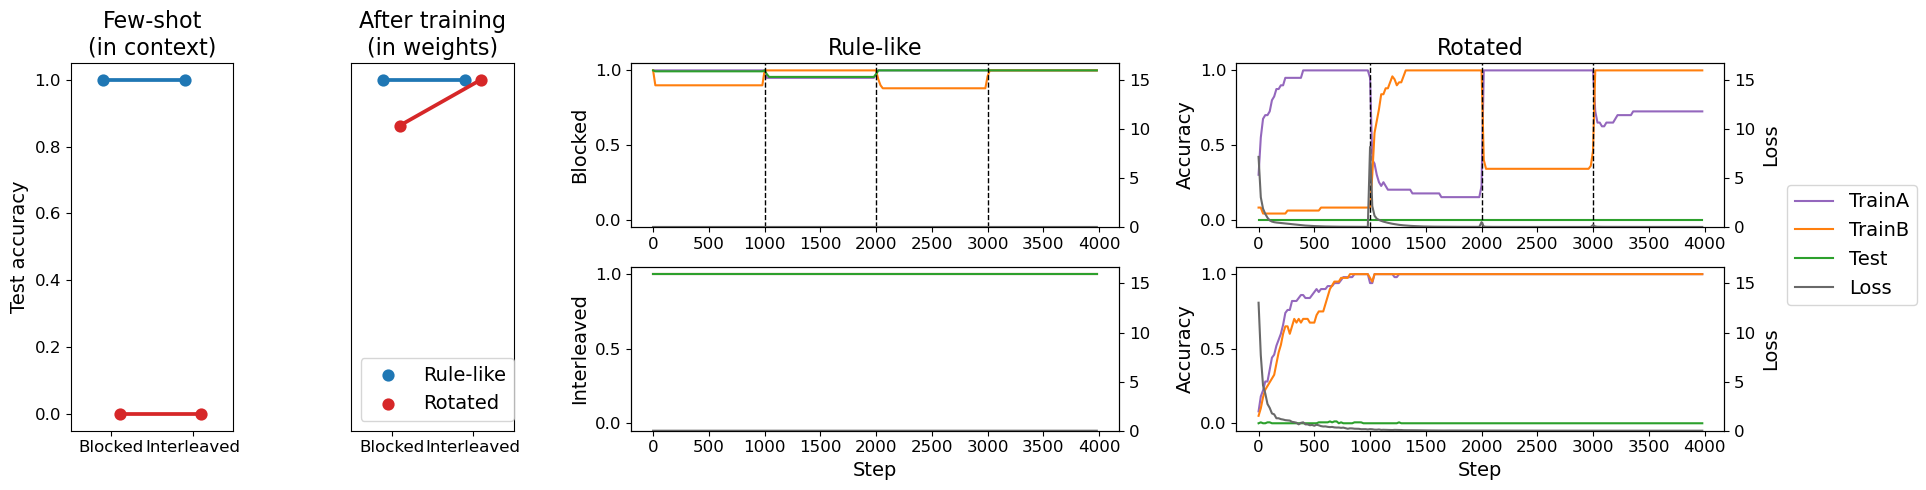

In [10]:
plot_results(dfs, task='grid', n_blocks=4, n_steps=1000, all_ctx_conds=False)

### Blocking over context vs. steps

In [11]:
path = '../../results/grid_iwl_icl_unrotated_blocked'
seeds = [i for i in range(1,11)]
fns = [f'{path}_seed{seed}' for seed in seeds]

results = load_results(seeds, fns, all_ctx_conds=False, is_ctx_step=True)

In [14]:
dfs = get_dataframes(results, n_groups=2, thresh=0.9, task='grid', 
                     is_ctx_step=True)

Removed seeds {1, 5, 7, 8, 10} due to threshold 0.9


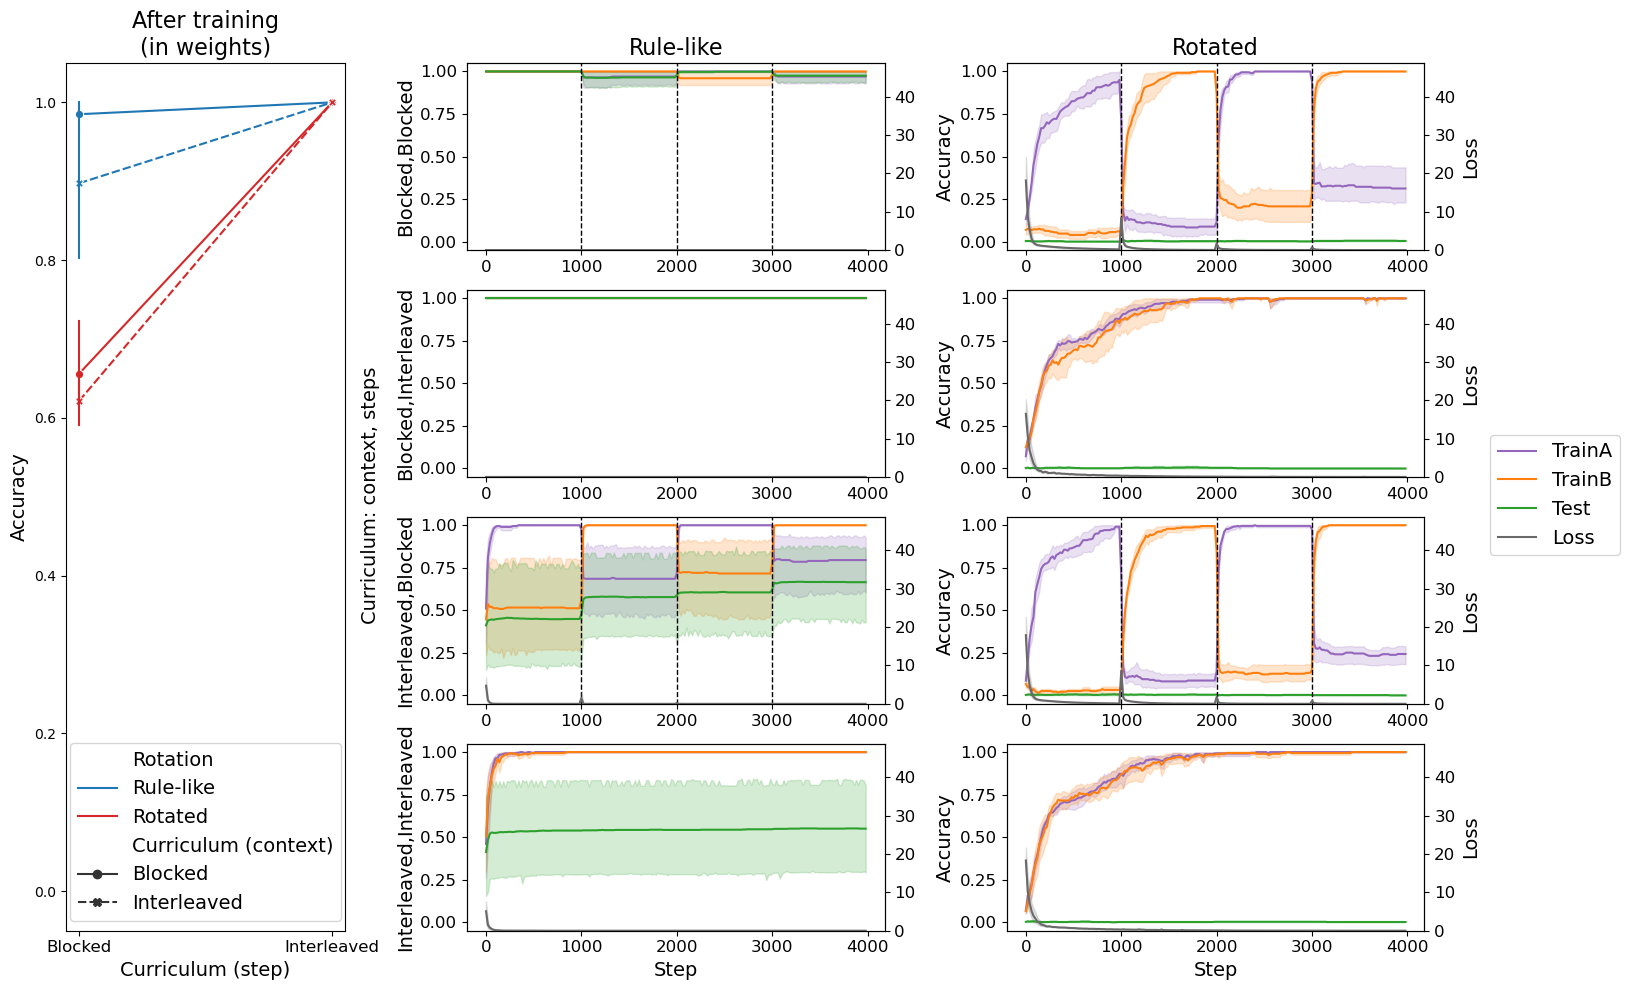

In [15]:
plot_ctx_step(dfs, task='grid', n_blocks=4, n_steps=1000, downsample_step=1)
